In [205]:
# Importing libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,GradientBoostingRegressor

In [256]:
train_original = pd.read_csv('/content/train_v9rqX0R.csv')
test_original= pd.read_csv('/content/test_AbJTz2l.csv')
ss=pd.read_csv('/content/sample_submission_8RXa3c6.csv')
test_copy = pd.read_csv('test_AbJTz2l.csv')

In [207]:
train=train_original.copy()
test=test_original.copy()

In [208]:
# Vizualizing Dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [209]:
# Vizualizing Dataset
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [210]:
#number of rows and columns
train.shape

(8523, 12)

In [212]:
test.shape

(5681, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [213]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Item_Identifier,Item_Fat_Content, Item_Type ,  Outlet_Identifier ,Outlet_Size,Outlet_Location_Type  ,Outlet_Type     are object.

In [ ]:
# List of unique products
print(len(train['Item_Identifier'].unique()))
print(len(train['Item_Weight'].unique()))
print(len(train['Item_Fat_Content'].unique()))
print(len(train['Item_Visibility'].unique()))
print(len(train['Item_Type'].unique()))
print(len(train['Item_MRP'].unique()))
print(len(train['Outlet_Identifier'].unique()))
print(len(train['Outlet_Establishment_Year'].unique()))
print(len(train['Outlet_Size'].unique()))
print(len(train['Outlet_Location_Type'].unique()))
print(len(train['Outlet_Type'].unique()))

1559
416
5
7880
16
5938
10
9
4
3
4


In [214]:
# Data description
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [215]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [216]:
train['Item_Fat_Content'].unique() # Item fat content is only 2 - Low fat and Normal, replace others with a standard on

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
train.replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'},inplace = True)


In [ ]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [217]:
test['Item_Fat_Content'].unique() 

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [218]:

test.replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'},inplace = True)

In [219]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
# Finding number of null values in each column
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Visualizing Missing Data(Matrix)

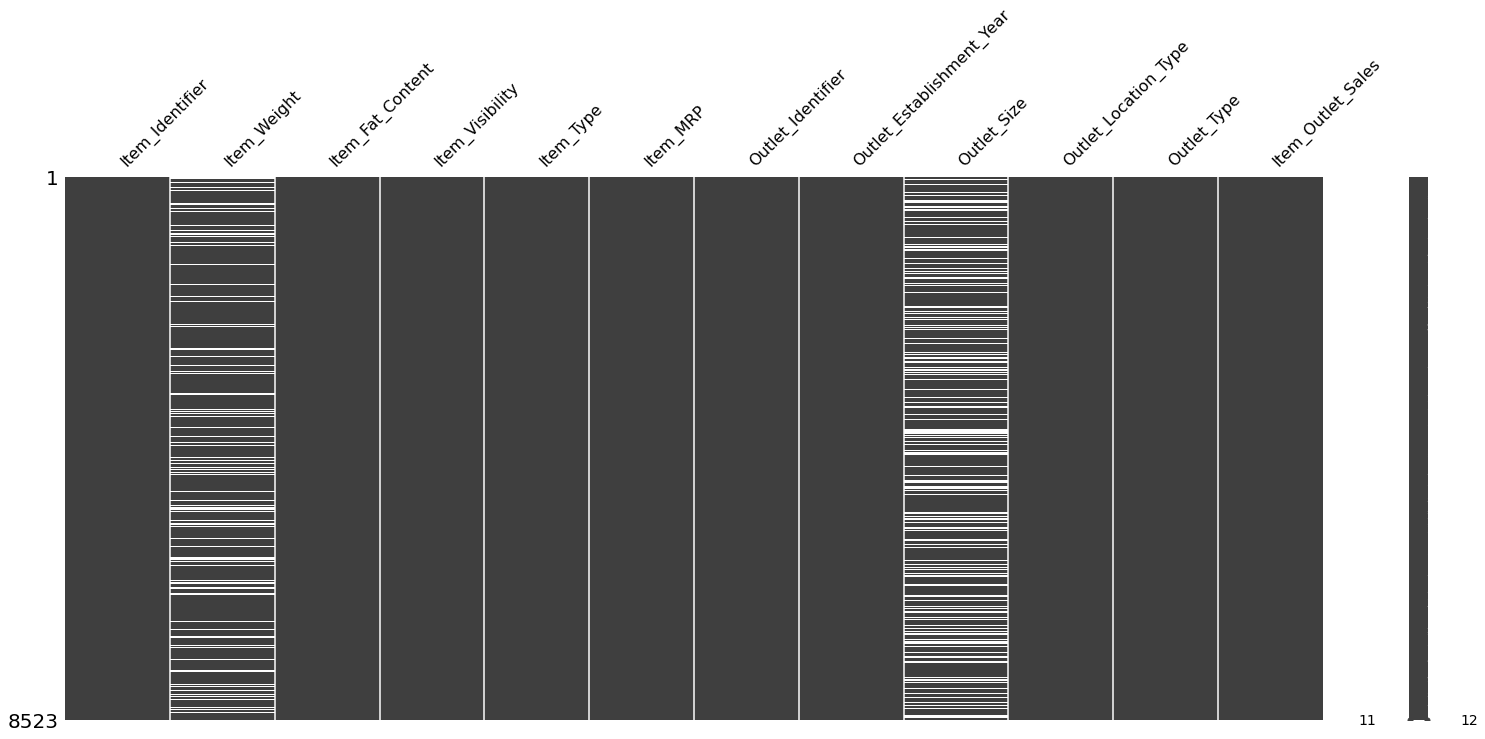

<Figure size 1080x648 with 0 Axes>

In [ ]:
import missingno as msno  # import missingno library
msno.matrix(train)
plt.figure(figsize = (15,9))
plt.show()

#Visualizing Missing Data(Correlation Heatmap)

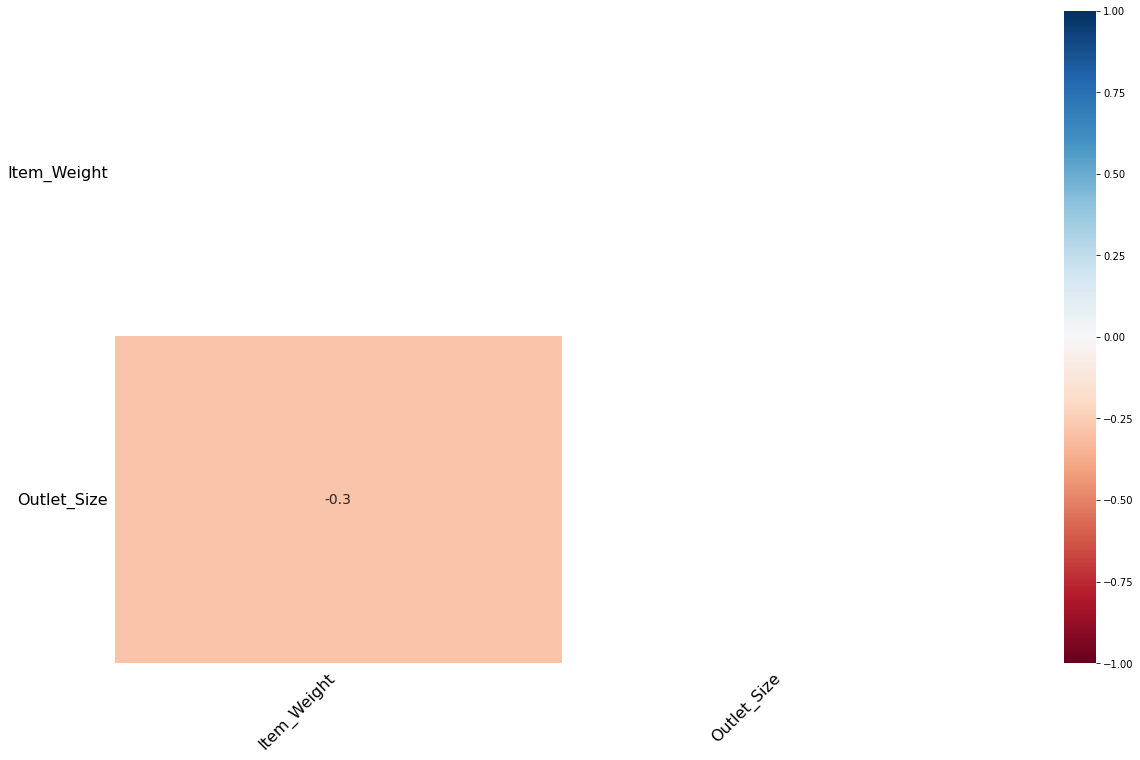

In [220]:
msno.heatmap(train)


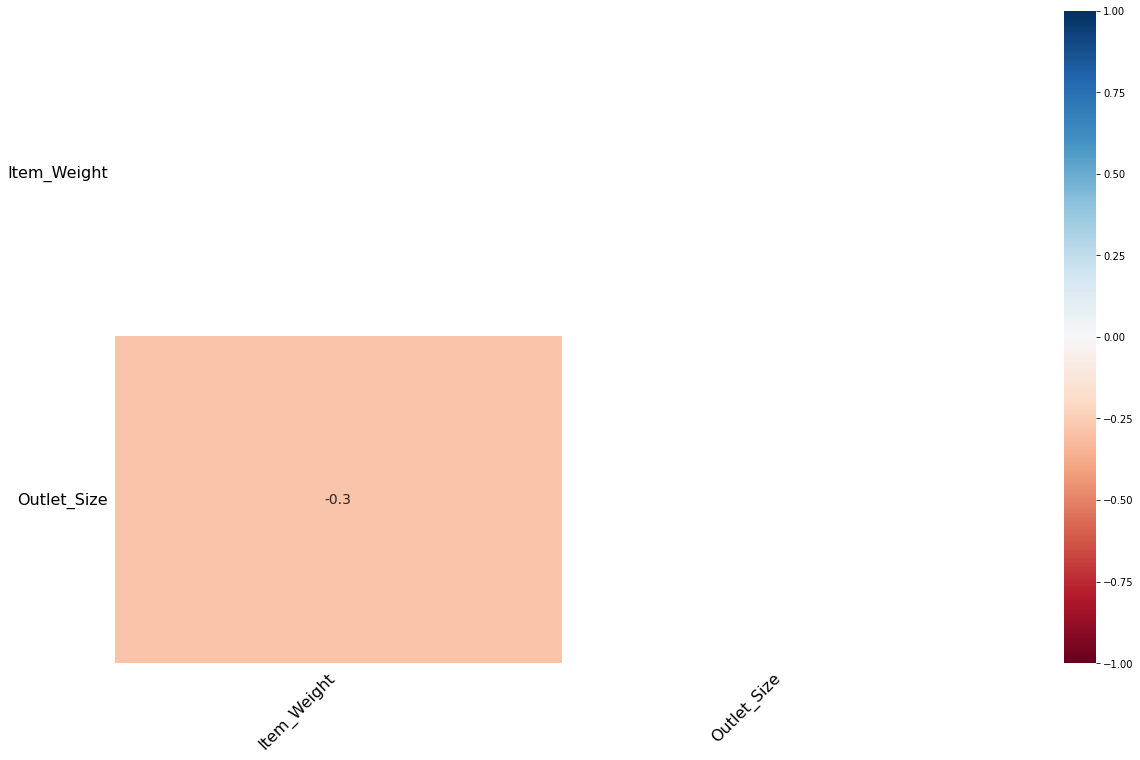

In [221]:
msno.heatmap(train, labels = True)

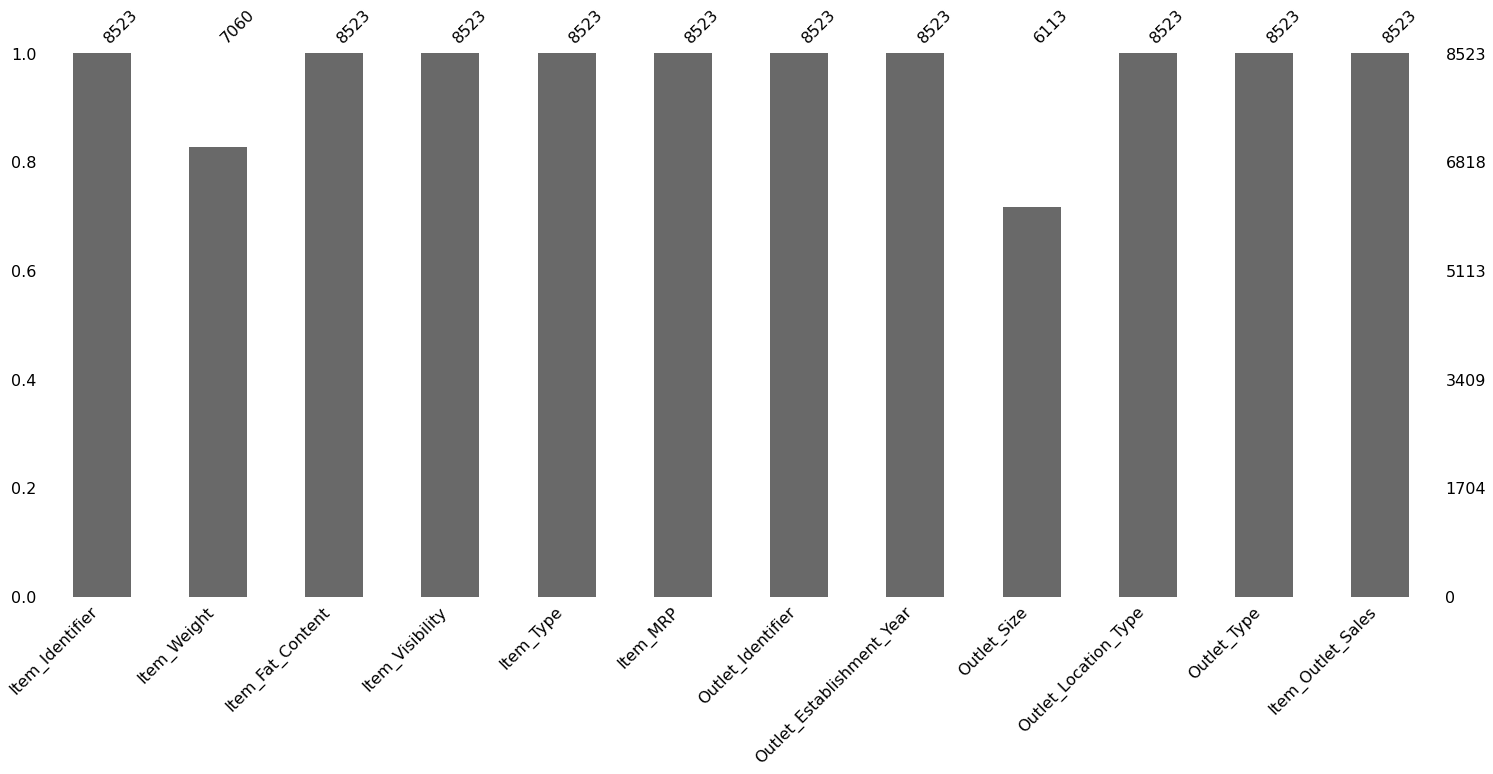

In [222]:
msno.bar(train)

In [223]:
#Visualizing Missing Data(Dendrogram)

In [224]:
#columns having missing values
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
missing_columns

['Item_Weight', 'Outlet_Size']

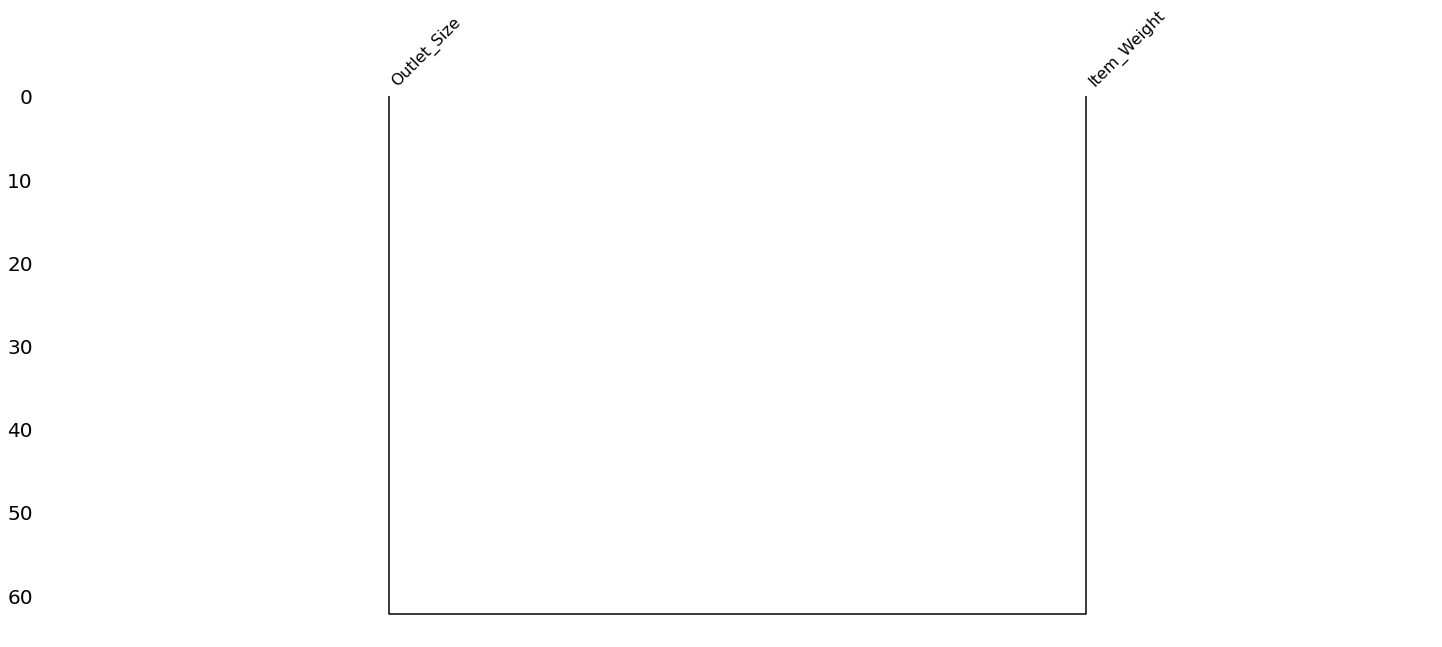

In [225]:
msno.dendrogram(train[missing_columns])

In [226]:
def download_preds(preds_test,file_name='bigmart_sales_prediction.csv'):
  ss[TARGET_COL]=preds_test#saving our predictions to csv file
  ss.to_csv(file_name,index=False)
  #downloding and submitting the csv file
  from google.colab import file
  files.download(file_name)

In [227]:
from sklearn.preprocessing import LabelEncoder
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(train['Item_Identifier'])
train['Item_Identifier']=lbl_encode.fit_transform(train['Item_Identifier'])


In [228]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,1297,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [229]:
from sklearn.preprocessing import LabelEncoder
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(train['Item_Fat_Content'])
train['Item_Fat_Content']=lbl_encode.fit_transform(train['Item_Fat_Content'])

In [230]:
from sklearn.preprocessing import LabelEncoder
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(train['Item_Type'])
train['Item_Type']=lbl_encode.fit_transform(train['Item_Type'])

In [231]:
from sklearn.preprocessing import LabelEncoder
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(train['Outlet_Identifier'])
train['Outlet_Identifier']=lbl_encode.fit_transform(train['Outlet_Identifier'])

In [232]:
from sklearn.preprocessing import LabelEncoder
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(train['Outlet_Size'])
train['Outlet_Size']=lbl_encode.fit_transform(train['Outlet_Size'])

In [233]:
from sklearn.preprocessing import LabelEncoder
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Location_Type']=lbl_encode.fit_transform(train['Outlet_Location_Type'])

In [234]:
from sklearn.preprocessing import LabelEncoder
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(train['Outlet_Type'])
train['Outlet_Type']=lbl_encode.fit_transform(train['Outlet_Type'])

In [235]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [236]:
x_train= train.iloc[:,[0,6]]

y_train= train[['Item_Outlet_Sales']]

In [237]:
x_train.head()

,Item_Identifier,Outlet_Identifier
0,156,9
1,8,3
2,662,9
3,1121,0
4,1297,1


In [238]:
y_train.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [239]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [240]:
x_test= test.iloc[:,[0,6]]

In [241]:
x_test.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [245]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=100)

#linear regression

In [246]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)



In [247]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2778261.979808152

In [248]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
mean_squared_error(y_test, y_pred_knn)

2884776.552128525

random forest regression

In [249]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))

2354835.66


In [250]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials

In [ ]:
space ={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}

In [ ]:
def hyperparameter_tuning(params):
    clf = RandomForestRegressor(**params)
    score=mean_squared_error(y_test, y_pred_rf)
    return score

In [ ]:
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=50, 
    trials=trials
)

print("Best: {}".format(best))

In [251]:
rf_reg = RandomForestRegressor(max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=382)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))

2197703.76


In [254]:
predictions = rf_reg.predict(x_test)
predictions

array([2368.41515301, 2516.21439712, 3584.19997588, ..., 2439.75607752,
        274.67617359,  524.93305675])

In [258]:
submission = pd.DataFrame()
submission[['Item_Identifier','Outlet_Identifier']] = test_copy[['Item_Identifier','Outlet_Identifier']]
submission['Item_Outlet_Sales'] = test_copy(predictions)

TypeError: ignored

In [259]:
submission.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [260]:
submission.to_csv('submission.csv',index=False) # converting to cav file